In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

# Notes

# Eric
## What I looked for:
    Created histogram for 2020's AgeCategory, and saw if there was a coorelation between BMI and if they had heart disease
## NOTES: READ THIS
    2020 data says if patient had heart disease while 2022 doesn't, not sure if i missed the column, but it might be good to focus on 2020 for now

In [3]:
df2020 = pd.read_csv("heart-disease/2020/heart_2020_cleaned.csv")
df2020

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
df2022 = pd.read_csv("heart-disease/2022/heart_2022_no_nans.csv")
df2022

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [5]:
print(df2020.columns)
print(df2022.columns)
print(df2020.columns.intersection(df2022.columns))

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLa

In [6]:
# remaps columns in 2022 to match those in 2020, i didn't use this but it could be helpful

df2022["KidneyDisease"] = df2022["HadKidneyDisease"]
df2022["SkinCancer"] = df2022["HadSkinCancer"]
df2022["Asthma"] = df2022["HadAsthma"]
df2022["PhysicalActivity"] = df2022["PhysicalActivities"]
df2022["Diabetes"] = df2022["HadDiabetes"]
df2022["SleepTime"] = df2022["SleepHours"]
df2022["GenHealth"] = df2022["GeneralHealth"]
df2022["Race"] = df2022["RaceEthnicityCategory"]
df2022["DiffWalking"] = df2022["DifficultyWalking"]
df2022["PhysicalHealth"] = df2022["PhysicalHealthDays"]
df2022["MentalHealth"] = df2022["MentalHealthDays"]
df2022["Stroke"] = df2022["HadStroke"]
df2022["AlcoholDrinking"] = df2022["AlcoholDrinkers"]
df2022["Smoking"] = df2022["SmokerStatus"]

## Part 1: Eric
### Null Hypothesis: There is no association between BMI and Heart Disease
### Alternative Hypothesis: There is an association between BMI and Heart Disease
### alpha = 0.05

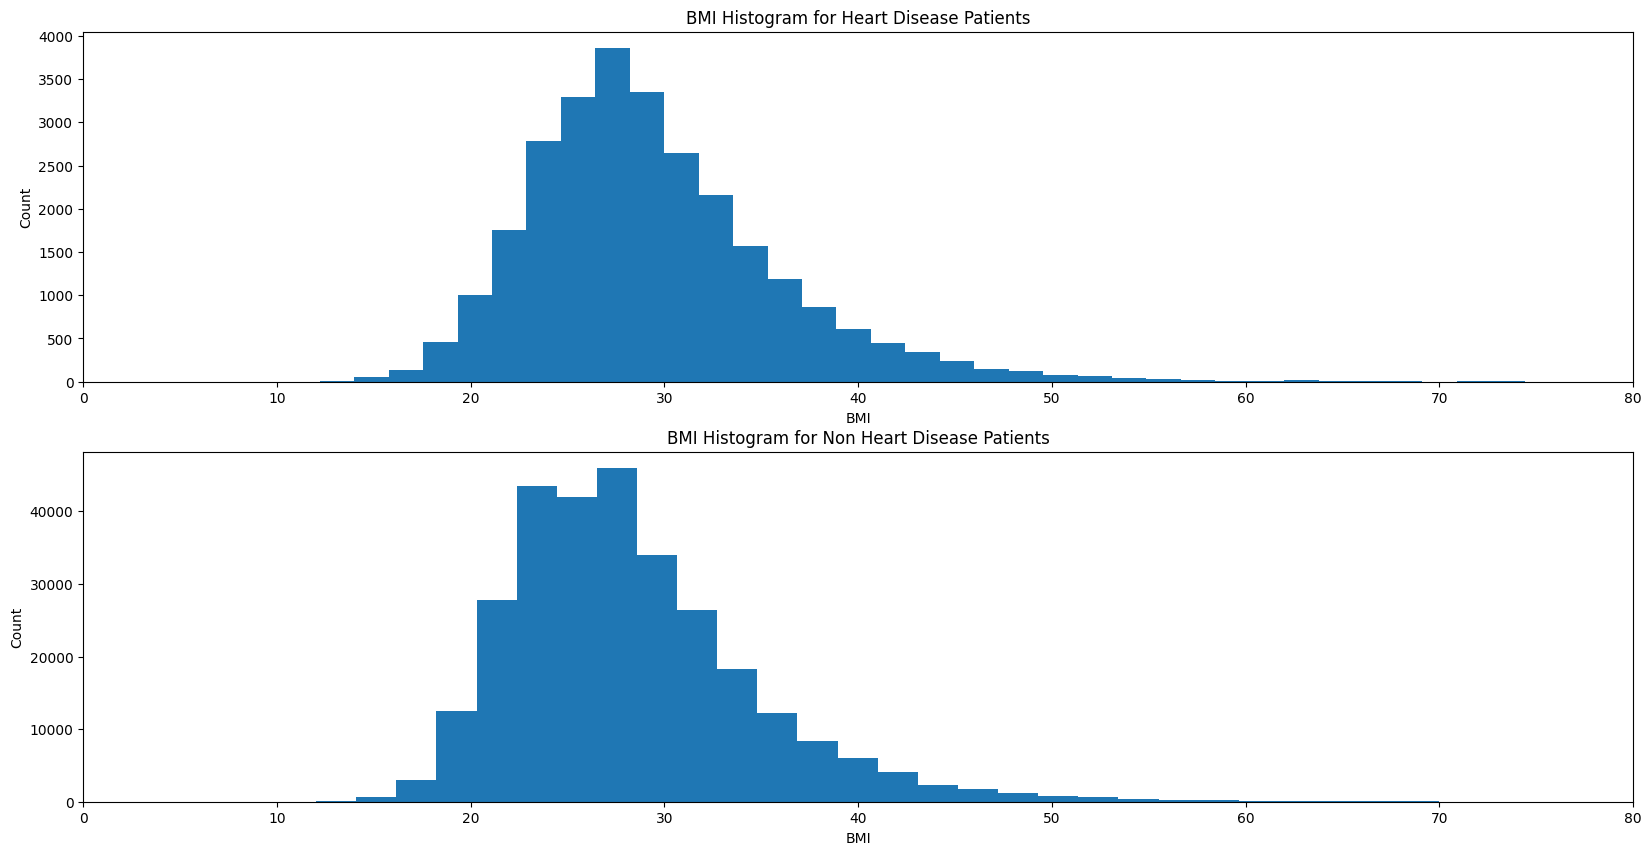

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

ax1.hist(df2020[df2020["HeartDisease"] == "Yes"]["BMI"], bins=40)
ax2.hist(df2020[df2020["HeartDisease"] == "No"]["BMI"], bins=40)

ax1.set_title('BMI Histogram for Heart Disease Patients')
ax2.set_title('BMI Histogram for Non Heart Disease Patients')

for ax in (ax1, ax2):
    ax.set_xlabel("BMI")
    ax.set_ylabel("Count")
    ax.set_xbound(lower=0, upper=80)

In [40]:
data_crosstab = pd.crosstab(pd.cut(df2020["BMI"], 40), df2020["HeartDisease"])
data_crosstab

HeartDisease,No,Yes
BMI,,
"(11.937, 14.091]",119,14
"(14.091, 16.162]",607,69
"(16.162, 18.232]",2984,237
"(18.232, 20.303]",12437,817
"(20.303, 22.374]",27722,1701
"(22.374, 24.444]",43499,3178
"(24.444, 26.515]",42045,3694
"(26.515, 28.586]",45920,4347
"(28.586, 30.657]",33924,3627


In [41]:
chi_contingency = scipy.stats.contingency.chi2_contingency(data_crosstab)
chi_contingency

Chi2ContingencyResult(statistic=np.float64(1126.2923927124457), pvalue=np.float64(1.4048700491399767e-211), dof=38, expected_freq=array([[1.21615804e+02, 1.13841961e+01],
       [6.18137469e+02, 5.78625307e+01],
       [2.94529702e+03, 2.75702975e+02],
       [1.21195178e+04, 1.13448222e+03],
       [2.69045248e+04, 2.51847521e+03],
       [4.26816607e+04, 3.99533927e+03],
       [4.18239493e+04, 3.91505073e+03],
       [4.59643730e+04, 4.30262697e+03],
       [3.43368049e+04, 3.21419510e+03],
       [2.67563913e+04, 2.50460874e+03],
       [1.85633266e+04, 1.73767343e+03],
       [1.25730624e+04, 1.17693757e+03],
       [8.58168661e+03, 8.03313388e+02],
       [6.11919518e+03, 5.72804816e+02],
       [4.18705839e+03, 3.91941609e+02],
       [2.44237453e+03, 2.28625473e+02],
       [1.80777778e+03, 1.69222224e+02],
       [1.25730624e+03, 1.17693757e+02],
       [7.89131118e+02, 7.38688816e+01],
       [6.15394256e+02, 5.76057443e+01],
       [3.48388130e+02, 3.26118701e+01],
       [2

## Conclusion

As we can see from the chi square test, comparing the distribution of BMI's of individuals without heart disease and BMI's of individuals with heart disease, we optain a p-value of 1.404e-211, which is less than our alpha of 0.05. As such we reject the null hypothesis, and conclude that there is an association between heart disease and bmi